In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np


In [2]:
X, y, coef = make_regression(n_samples=100,n_features=1,noise=4.0,bias=4.0,coef=True)
print(coef)
print(X.shape)
print(y.shape)

31.295271296567893
(100, 1)
(100,)


(-2, 2)

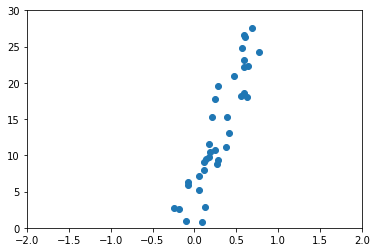

In [3]:
plt.scatter(X,y)
plt.ylim(0,30)
plt.xlim(-2,2)

In [4]:
X = 2* np.random.rand(100,1)
y = 4+ 21 * X + np.random.randn(100,1)
print(coef)
print(X.shape)
print(y.shape)

31.295271296567893
(100, 1)
(100, 1)


(-2, 2)

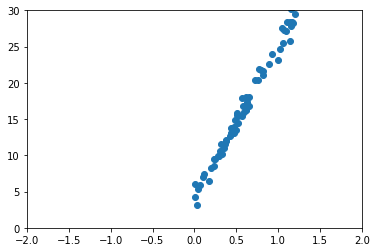

In [5]:
plt.scatter(X,y)
plt.ylim(0,30)
plt.xlim(-2,2)


In [6]:
X_b = np.c_[np.ones((100,1)),X]
print(X_b[:5])
print(X_b.shape)


[[1.         1.71269379]
 [1.         0.10686132]
 [1.         0.25001076]
 [1.         1.5916206 ]
 [1.         1.9617961 ]]
(100, 2)


In [7]:
print(X_b.T.shape)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta1_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

(2, 100)


In [8]:
theta_best

array([[ 4.28587497],
       [20.74332545]])

In [9]:
theta1_best

array([[23.93346393]])

In [10]:
X_new = np.array([[0],[2]])
print(X_new)
X_new_b=np.c_[np.ones((2,1)), X_new]
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[ 4.28587497]
 [45.77252586]]


(-25, 100)

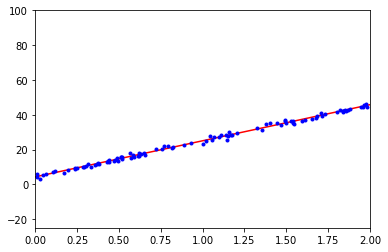

In [11]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.xlim(0,2)
plt.ylim(-25,100)

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([4.28587497]), array([[20.74332545]]))

In [14]:
m=100
n_epochs = 50
t0,t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg
sgd_reg.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [16]:
sgd_reg.set_params(eta0=0.1,penalty=None)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [17]:
sgd_reg.fit(X, y)

/Users/rjdaskeivch/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.29996541]), array([20.72945244]))

In [19]:
m = 100
X = 5 * np.random.rand(m,1)-2
y = 0.8 * X**2 + X + 3 + np.random.randn(m,1)

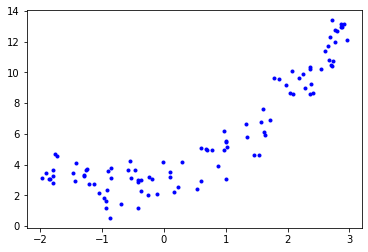

In [20]:
plt.plot(X,y, "b.")


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
X_poly[0]

[2.35952284]


array([2.35952284, 5.56734803])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lin_reg.intercept_,lin_reg.coef_

(array([3.05111811]), array([[1.11268769, 0.76620349]]))

In [24]:
X_new = np.linspace(-3,3,100).reshape(100,1)
print(X_new[:5])
X_new_poly=poly_features.transform(X_new)
print(X_new_poly.shape)
y_new=lin_reg.predict(X_new_poly)
print(y_new[:5])


[[-3.        ]
 [-2.93939394]
 [-2.87878788]
 [-2.81818182]
 [-2.75757576]]
(100, 2)
[[6.60888648]
 [6.40051698]
 [6.19777616]
 [6.00066402]
 [5.80918055]]


(0, 14)

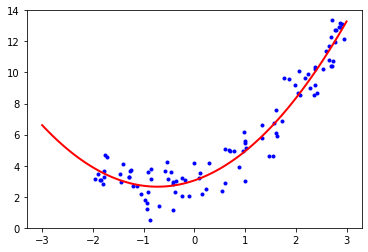

In [25]:
plt.plot(X,y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.ylim(0,14)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features2 = PolynomialFeatures(degree=15, include_bias=False)
X_poly2 = poly_features2.fit_transform(X)
print(X[0])
X_poly2[0]

[2.35952284]


array([2.35952284e+00, 5.56734803e+00, 1.31362848e+01, 3.09953641e+01,
       7.31342694e+01, 1.72561979e+02, 4.07163931e+02, 9.60712594e+02,
       2.26682331e+03, 5.34862137e+03, 1.26201943e+04, 2.97776366e+04,
       7.02610137e+04, 1.65782467e+05, 3.91167516e+05])

In [27]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lin_reg2.intercept_,lin_reg2.coef_

(array([2.86488022]),
 array([[-3.06589176e-01,  2.44799411e+00,  7.01117660e+00,
         -3.74465059e+00, -9.60512216e+00,  3.19221977e+00,
          5.74001317e+00, -1.46689387e+00, -1.79095743e+00,
          4.56504233e-01,  2.86869251e-01, -9.15283038e-02,
         -1.53572275e-02,  8.08835656e-03, -7.59885355e-04]]))

In [29]:
X_new = np.linspace(-3,3,100).reshape(100,1)
print(X_new[:5])
X_new_poly2=poly_features2.transform(X_new)
print(X_new_poly2.shape)
y_new2=lin_reg2.predict(X_new_poly2)
print(y_new[:5])



[[-3.        ]
 [-2.93939394]
 [-2.87878788]
 [-2.81818182]
 [-2.75757576]]
(100, 15)
[[6.60888648]
 [6.40051698]
 [6.19777616]
 [6.00066402]
 [5.80918055]]


(0, 14)

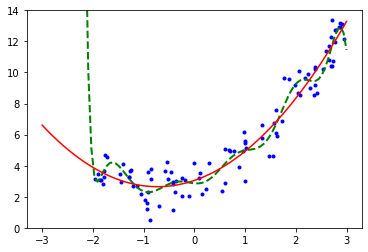

In [30]:
plt.plot(X,y, "b.")
plt.plot(X_new, y_new2, "g--", linewidth=2, label="Predictions")
plt.plot(X_new, y_new, "r-")
plt.ylim(0,14)

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg_flat = LinearRegression()
lin_reg_flat.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_new_flat = lin_reg_flat.predict(X_new)

(0, 14)

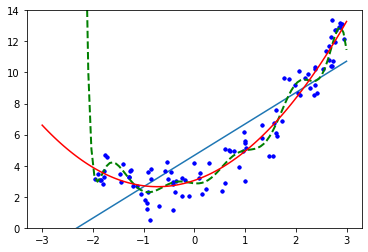

In [33]:
plt.plot(X,y, "b.")
plt.plot(X_new,y_new_flat)
plt.plot(X,y, "b.")
plt.plot(X_new, y_new2, "g--", linewidth=2, label="Predictions")
plt.plot(X_new, y_new, "r-")
plt.ylim(0,14)

# Implementing Learning Curves Manually

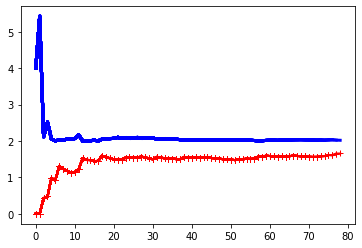

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
train_errors, val_errors = [], []
for m in range(1, len(X_train)):
    lin_reg_flat.fit(X_train[:m],y_train[:m])
    y_train_predict = lin_reg_flat.predict(X_train[:m])
    y_val_predict = lin_reg_flat.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


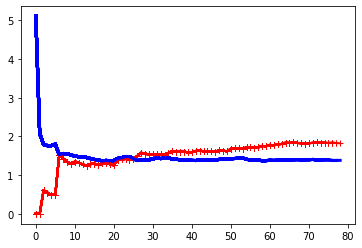

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
train_errors, val_errors = [], []
for m in range(1, len(X_train)):
    lin_reg2.fit(X_train[:m],y_train[:m])
    y_train_predict = lin_reg2.predict(X_train[:m])
    y_val_predict = lin_reg2.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")



In [36]:
from sklearn.pipeline import Pipeline
poly_r = Pipeline([("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
                                ("lin_reg",LinearRegression()),])

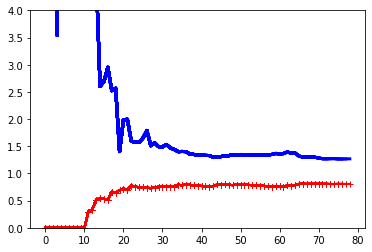

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
train_errors, val_errors = [], []
for m in range(1, len(X_train)):
    poly_r.fit(X_train[:m],y_train[:m])
    y_train_predict = poly_r.predict(X_train[:m])
    y_val_predict = poly_r.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylim(0,4)



# Implementing Learning Curves in Scikit-Learn

In [38]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
        lin_reg, X=X,y=y,train_sizes=[5,20,40,60,80],shuffle=True,scoring='neg_mean_squared_error')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(validation_scores, axis=1)
test_scores_std = np.std(validation_scores, axis=1)
    


    
    

In [39]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.95955506 -2.86805053 -2.07263281 -1.06064967 -1.38657654]
 [-1.63953173 -2.79267971 -2.62682377 -3.44592173 -2.83002298]
 [-2.35798281 -2.8453385  -2.92229606 -2.93800922 -3.19275945]
 [-2.68715957 -3.02371089 -2.70219442 -2.84923668 -3.4767727 ]
 [-2.83012661 -2.98983146 -2.73891682 -3.24931295 -3.14464369]]

 ----------------------------------------------------------------------

Validation scores:

 [[-6.40787681 -4.11881683 -4.30263902 -9.33803073 -6.45044319]
 [-4.77230619 -2.80084681 -4.14835849 -2.32107914 -2.99788708]
 [-3.7847359  -3.14553142 -4.04234261 -2.17868072 -2.97302362]
 [-3.79986876 -3.40063354 -4.02766165 -1.91213423 -2.4566885 ]
 [-3.72050024 -3.12338657 -4.06354702 -2.070993   -2.51805015]]


In [40]:
import pandas as pd
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     1.669493
20    2.666996
40    2.851277
60    2.947815
80    2.990566
dtype: float64

 --------------------

Mean validation scores

 5     6.123561
20    3.408096
40    3.224863
60    3.119397
80    3.099295
dtype: float64


(0, 5)

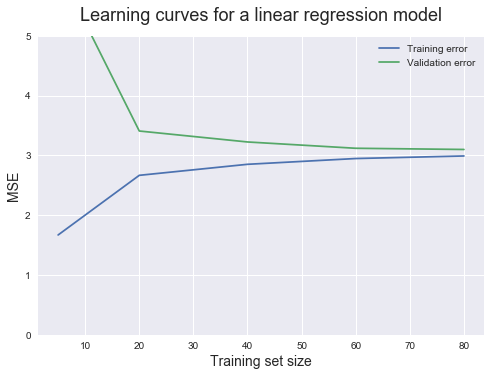

In [41]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,5)

In [42]:
from sklearn.pipeline import Pipeline
poly_r = Pipeline([("poly_features", PolynomialFeatures(degree=8,include_bias=False)),
                                ("lin_reg",LinearRegression()),])

In [43]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
        poly_r, X=X,y=y,train_sizes=[5,20,40,60,80],shuffle=True,scoring='neg_mean_squared_error')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(validation_scores, axis=1)
test_scores_std = np.std(validation_scores, axis=1)

In [44]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-1.02544029e-25 -3.56219549e-24 -1.16928908e-27 -4.02319062e-29
  -3.17910945e-29]
 [-6.49963519e-01 -7.35034886e-01 -2.76379907e-01 -4.79015005e-01
  -2.87137477e-01]
 [-7.09214407e-01 -8.30715767e-01 -6.56443336e-01 -8.18633304e-01
  -5.88742884e-01]
 [-7.75875366e-01 -8.29058476e-01 -7.01993955e-01 -7.75683742e-01
  -7.41740172e-01]
 [-7.91353584e-01 -7.48414217e-01 -7.78065434e-01 -7.87799416e-01
  -8.11105286e-01]]

 ----------------------------------------------------------------------

Validation scores:

 [[-1.80049628e+01 -1.80938186e+04 -1.02956395e+03 -4.53655393e+01
  -1.04449673e+05]
 [-7.61707578e+01 -1.01477852e+00 -4.88136027e+00 -1.28174893e+00
  -8.79594431e+01]
 [-9.75687046e-01 -9.35902106e-01 -1.76005147e+00 -1.05653372e+00
  -1.00856129e+00]
 [-9.59053462e-01 -1.13068998e+00 -2.16228213e+00 -9.88652319e-01
  -9.01629799e-01]
 [-9.06600380e-01 -1.08868843e+00 -9.95347354e-01 -8.97929438e-01
  -8.10399536e-01]]


In [45]:
import pandas as pd
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     7.331962e-25
20    4.855062e-01
40    7.207499e-01
60    7.648703e-01
80    7.833476e-01
dtype: float64

 --------------------

Mean validation scores

 5     24727.285193
20       34.261618
40        1.147347
60        1.228462
80        0.939793
dtype: float64


(0, 10)

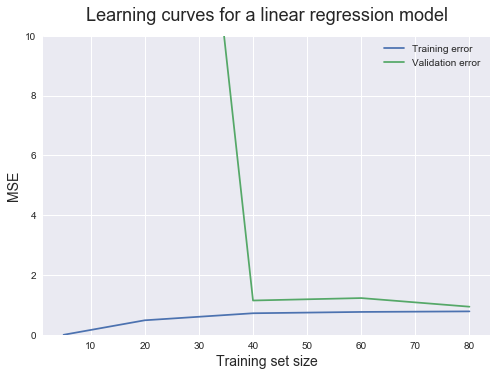

In [46]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,10)
